In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

<div class="alert-warning">
    
## Instructions  
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
  
- Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 

### Group work instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   
### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  


### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Note: Unlike previous assignments, this one is open-ended and project-style. Treat it as an opportunity to explore, experiment, and learn._

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor

<!-- END QUESTION -->

## Introduction

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (10-14 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


<div class="alert alert-info">
    
**Your tasks:**

1. Review the available datasets and choose the one you find most interesting. It may help to read through the dataset documentation on Kaggle before deciding.
2. Once you've selected a dataset, take time to understand the problem it represents and the meaning of each feature. Use the Kaggle documentation to guide you.
3. Download the dataset and load it into a pandas DataFrame.
4. Write a few sentences summarizing your initial thoughts about the problem and the dataset.
   
</div>

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

I choose option 1, the [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset).

My initial thoughts about the problem and the dataset: 
This is a binary classification problem where the goal is to predict whether a credit card client will default on their next month’s payment. The dataset contains 30,000 samples and 24 features, including demographic information (e.g., sex, education, marriage, and age), credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. The target variable, `default.payment.next.month`, takes the value `1` if the client defaults and `0` otherwise. 
The problem is likely imbalanced since most clients typically do not default. Thus, model evaluation should consider metrics beyond simple accuracy, such as ROC-AUC. Feature preprocessing and scaling will also be important due to the mix of categorical and continuous variables.



In [4]:
df = pd.read_csv("data/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.

</div>

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [5]:
train_df, test_df = train_test_split(df, train_size=0.3, random_state=123)
train_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
8388,8389,180000.0,1,2,1,30,-1,-1,-1,-1,...,750.0,375.0,399.0,375.0,375.0,750.0,0.0,399.0,399.0,1
11746,11747,180000.0,1,1,2,33,0,0,0,-1,...,3000.0,0.0,0.0,3000.0,40129.0,3000.0,0.0,0.0,0.0,0
14284,14285,10000.0,1,2,1,47,0,0,0,0,...,6376.0,6530.0,1506.0,1159.0,3001.0,350.0,3002.0,1606.0,6276.0,0
21820,21821,30000.0,2,1,2,27,0,0,0,0,...,11492.0,14285.0,17056.0,2000.0,3000.0,3000.0,3000.0,3000.0,1000.0,0
22146,22147,360000.0,2,2,2,29,-2,-2,-2,-2,...,1707.0,792.0,1346.0,1307.0,747.0,1707.0,850.0,1346.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,380000.0,2,2,1,37,0,0,0,0,...,14291.0,15949.0,15556.0,1204.0,1300.0,1242.0,1900.0,0.0,3000.0,0
17730,17731,360000.0,2,1,1,54,1,-2,-2,-1,...,2580.0,2580.0,6941.0,0.0,0.0,2580.0,0.0,6941.0,0.0,0
28030,28031,50000.0,2,3,1,29,0,0,0,0,...,39420.0,8824.0,9009.0,2002.0,2000.0,1530.0,1000.0,327.0,329.0,1
15725,15726,30000.0,2,2,2,21,0,0,0,0,...,30841.0,29434.0,16565.0,2000.0,2000.0,2000.0,1765.0,331.0,0.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA
<hr>
rubric={points:10}

<div class="alert alert-info">

**Your tasks:**

1. **Perform exploratory data analysis (EDA)**: Conduct an initial exploration of the training set to better understand its characteristics.

2. **Summarize and visualize the data**: Include at least **two summary statistics** and **two visualizations** that you find informative. For each, write **one sentence** explaining what insight it provides.

3. **Record your observations**: Summarize your **initial observations** about the dataset based on your EDA.

4. **Select evaluation metrics**: Choose one or more **appropriate metrics** for assessing model performance and briefly justify your choice.

</div>

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

## Summary of all the insights (So it's easier for TAs to grade.):
1. `default.payment.next.month` has a mean of 0.226, meaning about 22.6% of clients default, showing class imbalance.
2. Both `SEX` and `EDUCATION` show meaningful differences in `default.payment.next.month`, so they are informative categorical features for modeling.
3. `PAY_0` to `PAY_6` means are all negative, suggesting most users pay on schedule or have small delays.
4. There is no missing data so no imputation is needed.
5. Some of the features, like those `PAY_AMT`s, are mainly focus around 0.
6. The features ranges very differently, some scaling and standarize may be needed.
7. The categorical features is mixed with numerical features with their data type being int64. We need to handle numeric scaling and categorical encoding separately when working on preprocessing.
8. There are quite a few outliers, mainly focused on `Repayment status` and `Amount of bill statement` of different months.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 8388 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          9000 non-null   int64  
 1   LIMIT_BAL                   9000 non-null   float64
 2   SEX                         9000 non-null   int64  
 3   EDUCATION                   9000 non-null   int64  
 4   MARRIAGE                    9000 non-null   int64  
 5   AGE                         9000 non-null   int64  
 6   PAY_0                       9000 non-null   int64  
 7   PAY_2                       9000 non-null   int64  
 8   PAY_3                       9000 non-null   int64  
 9   PAY_4                       9000 non-null   int64  
 10  PAY_5                       9000 non-null   int64  
 11  PAY_6                       9000 non-null   int64  
 12  BILL_AMT1                   9000 non-null   float64
 13  BILL_AMT2                   9000 n

From this we can know these insights:
1. There is no missing data so no imputation is needed.
2. The categorical features is mixed with numerical features with their data type being int64. We need to handle numeric scaling and categorical encoding separately when working on preprocessing.

In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,9000.0,15069.999889,8627.548192,1.0,7596.75,15156.5,22514.75,30000.0
LIMIT_BAL,9000.0,166457.520000,129368.232680,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,9000.0,1.601556,0.489605,1.0,1.00,2.0,2.00,2.0
EDUCATION,9000.0,1.859333,0.788003,0.0,1.00,2.0,2.00,6.0
MARRIAGE,9000.0,1.551778,0.520485,0.0,1.00,2.0,2.00,3.0
AGE,9000.0,35.523111,9.214976,21.0,28.00,34.0,41.00,75.0
PAY_0,9000.0,-0.004778,1.118334,-2.0,-1.00,0.0,0.00,8.0
PAY_2,9000.0,-0.139778,1.183759,-2.0,-1.00,0.0,0.00,7.0
PAY_3,9000.0,-0.177222,1.188545,-2.0,-1.00,0.0,0.00,8.0
PAY_4,9000.0,-0.220556,1.162590,-2.0,-1.00,0.0,0.00,7.0


From this we can get these insights:
1. `default.payment.next.month` has a mean of 0.226, meaning about 22.6% of clients default, showing class imbalance.
2. `PAY_0` to `PAY_6` means are all negative, suggesting most users pay on schedule or have small delays.

In [8]:
train_df.groupby('SEX')['default.payment.next.month'].mean(), train_df.groupby('EDUCATION')['default.payment.next.month'].mean()

(SEX
 1    0.253207
 2    0.207425
 Name: default.payment.next.month, dtype: float64,
 EDUCATION
 0    0.000000
 1    0.199105
 2    0.238422
 3    0.258644
 4    0.066667
 5    0.047059
 6    0.285714
 Name: default.payment.next.month, dtype: float64)

Both `SEX` and `EDUCATION` show meaningful differences in `default.payment.next.month`, so they are informative categorical features for modeling.

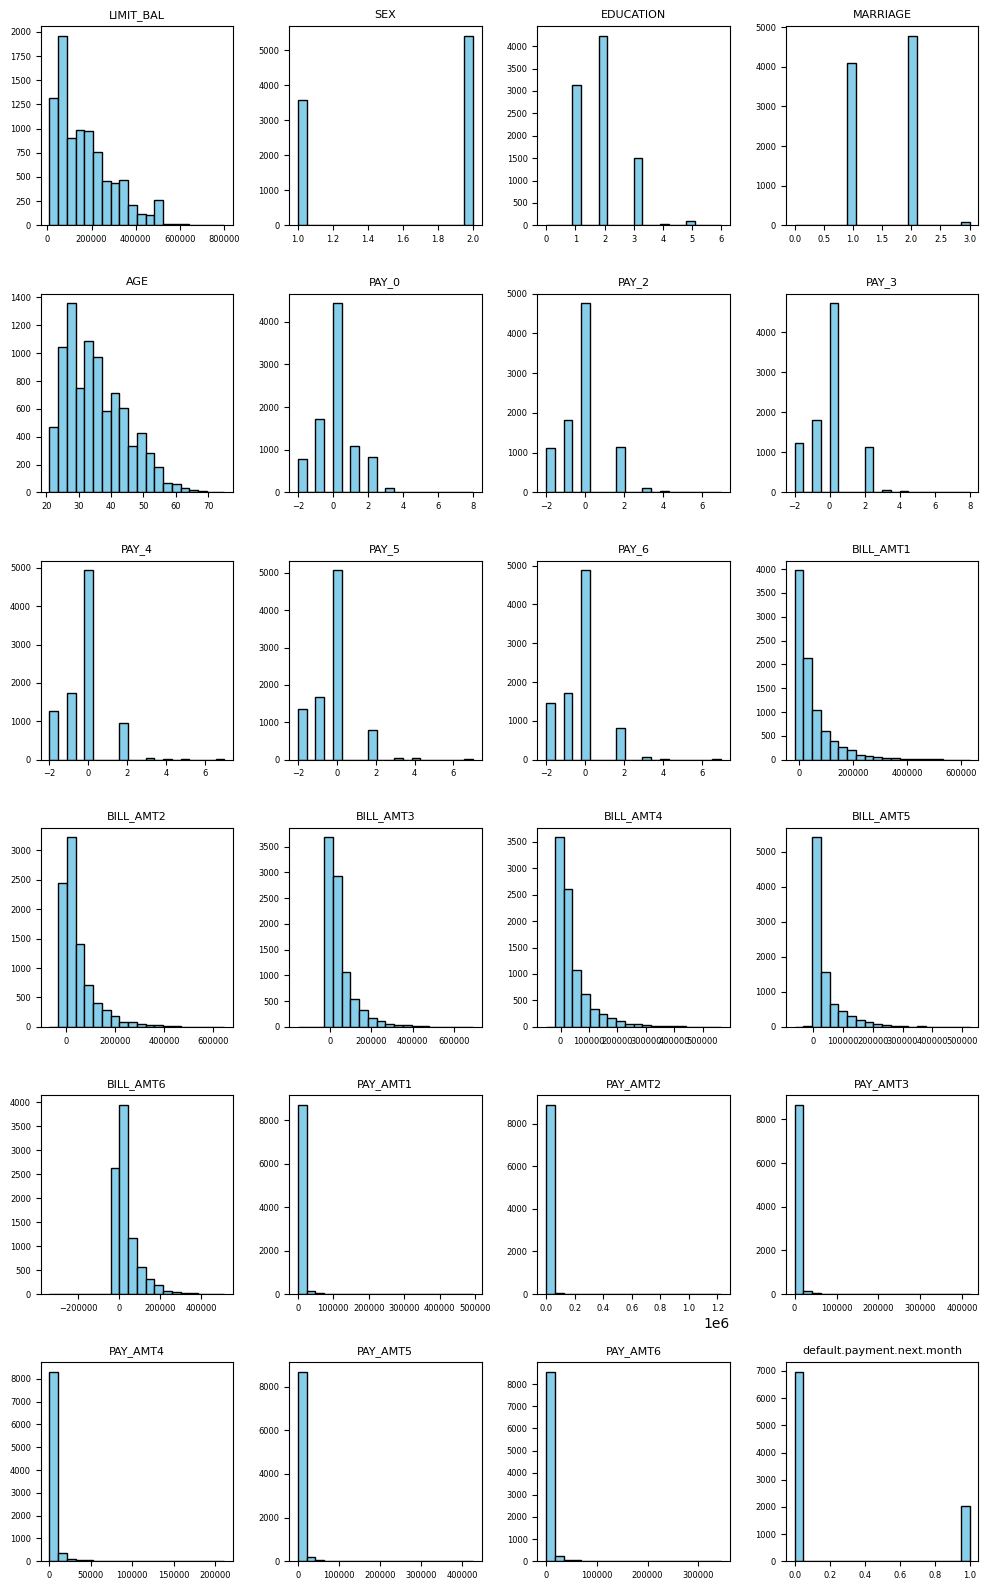

In [9]:
# ChatGPT-5 help me find the proper functions based on my description.
# It also helps me debug and make the code run.
fig, axs = plt.subplots(6, 4, figsize=(10, 16)) # Creates a figure with a grid of 6 rows × 4 columns = 24 subplots
axs = axs.flatten() # Converts the 2D array of axes into a 1D array for easier iteration
for ax, col in zip(axs, [col for col in train_df.columns if (col != 'ID')]):
    ax.hist(train_df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col, fontsize=8)
    # ax.set_yscale('log')
    ax.tick_params(axis='both', labelsize=6)
plt.tight_layout() # ChatGPT-5 tells me to add this to avoid overlap
plt.show()

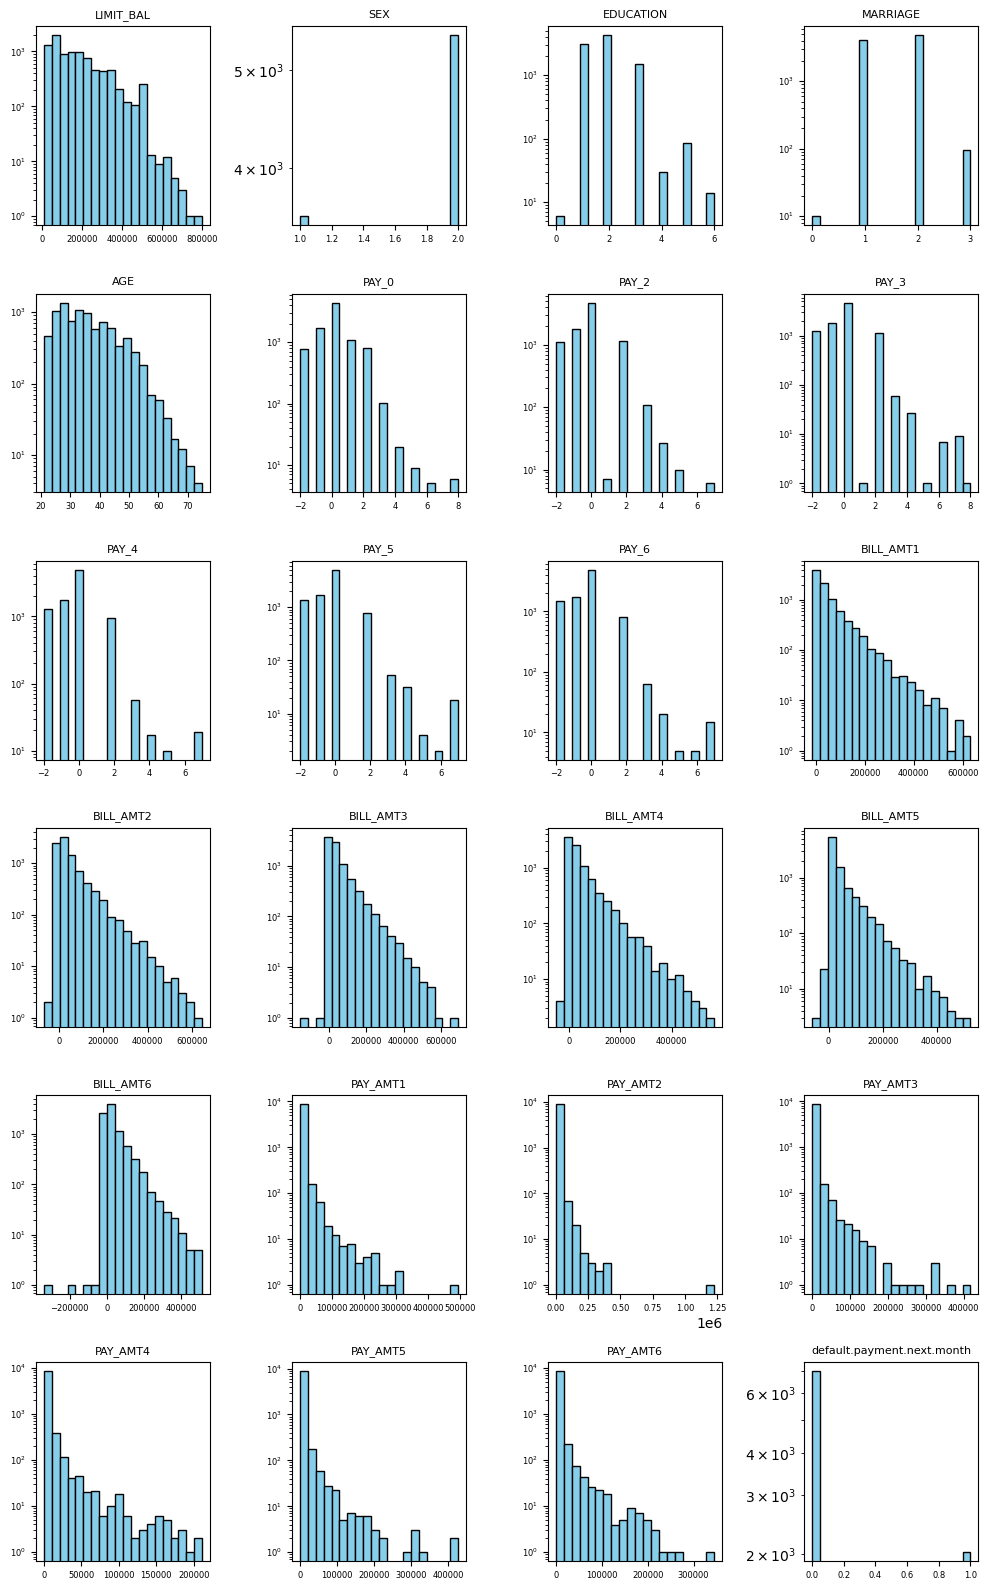

In [10]:
# ChatGPT-5 help me find the proper functions based on my description.
# It also helps me debug and make the code run.
fig, axs = plt.subplots(6, 4, figsize=(10, 16)) # Creates a figure with a grid of 6 rows × 4 columns = 24 subplots
axs = axs.flatten() # Converts the 2D array of axes into a 1D array for easier iteration
for ax, col in zip(axs, [col for col in train_df.columns if (col != 'ID')]):
    ax.hist(train_df[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col, fontsize=8)
    ax.set_yscale('log')
    ax.tick_params(axis='both', labelsize=6)
plt.tight_layout() # ChatGPT-5 tells me to add this to avoid overlap
plt.show()

1. Some of the features, like those `PAY_AMT`s, are mainly focus around 0.
2. The features ranges very differently, some scaling and standarize may be needed.

In [11]:
categorical_features = [
    "SEX", 
    "EDUCATION", 
    "MARRIAGE", 
    "default.payment.next.month", 
    "PAY_0",
    "PAY_1",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    ]

numeric_features = [col for col in train_df.columns if ((not (col in categorical_features)) & (col != 'ID'))]

In [72]:
# I learn this from STAT 200
Q1 = train_df[numeric_features].quantile(0.25)
Q3 = train_df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((train_df[numeric_features] < (Q1 - 1.5 * IQR)) |
                (train_df[numeric_features] > (Q3 + 1.5 * IQR)))
outlier_counts = outlier_mask.sum().sort_values(ascending=False)
print(outlier_counts)

DELAY_COUNT        1011
PAY_AMT5            894
PAY_AMT4            884
PAY_AMT6            863
BILL_AMT5           824
BILL_AMT4           824
PAY_AMT1            804
BILL_AMT6           802
PAY_AMT2            796
PAY_AMT3            791
BILL_AMT3           742
BILL_AMT2           738
BILL_AMT1           729
AGE                  93
LIMIT_BAL            44
AVG_UTILIZATION      10
dtype: int64


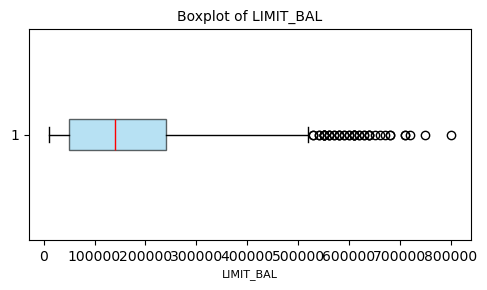

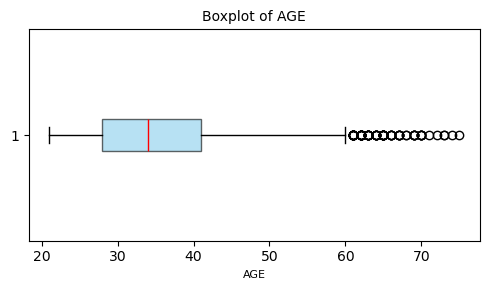

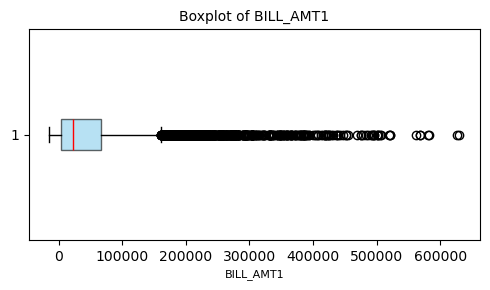

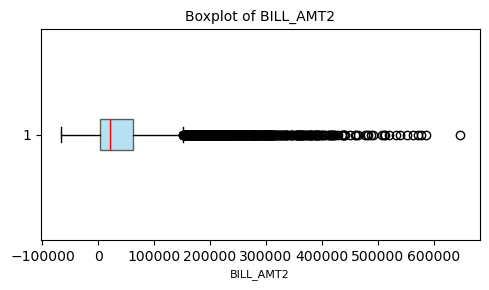

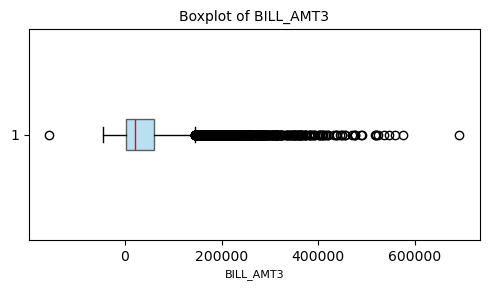

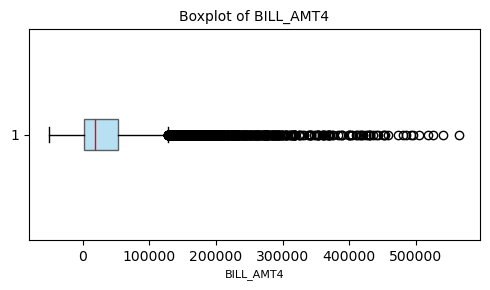

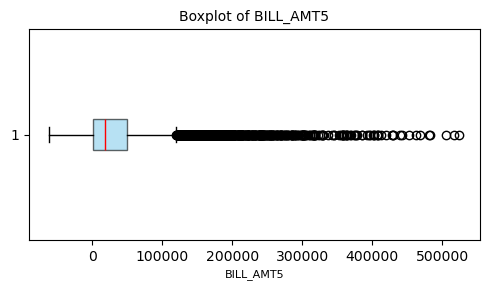

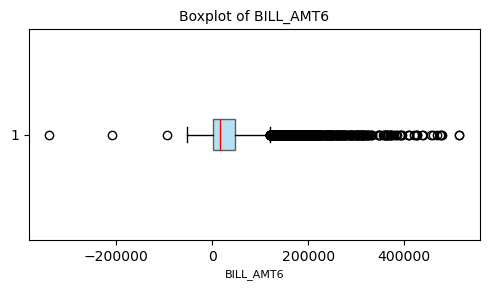

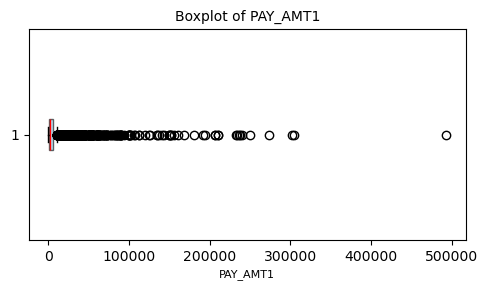

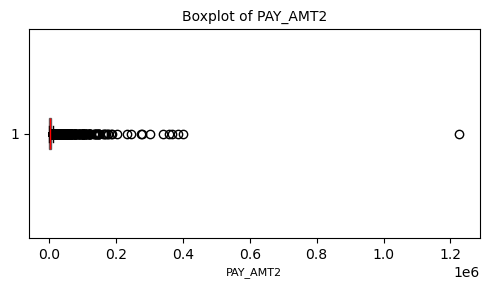

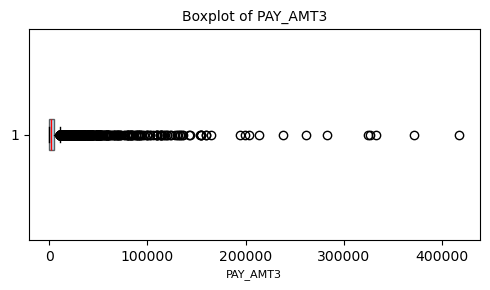

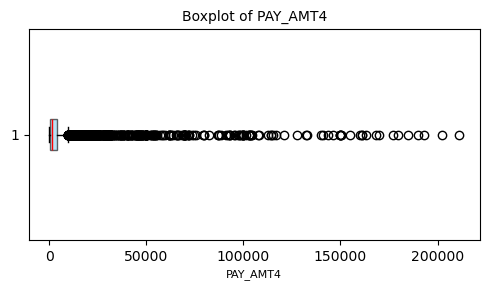

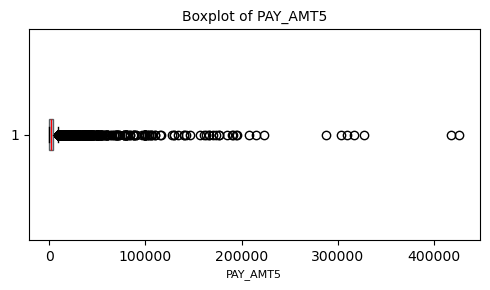

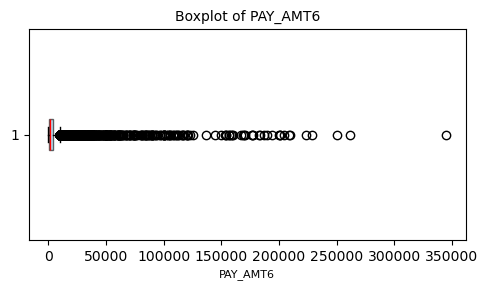

In [13]:
# ChatGPT-5 helps me add these parameters to make the plot looks prettier
for col in numeric_features:
    plt.figure(figsize=(5, 3))
    plt.boxplot(train_df[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='skyblue', alpha=0.6),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.tight_layout()
    plt.show()


There are quite a few outliers, mainly focused on `Repayment status` and `Amount of bill statement` of different months.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering
<hr>
rubric={points:1}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature engineering**: Create new features that are relevant to the problem and use this updated feature set in the following exercises. You may need to iterate between **feature engineering** and **preprocessing** to refine your features and improve model performance.
   
</div>

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [14]:
# ChatGPT teaches me about the meaning of the original features.
# It also teaches me that: Utilization Ratio = Outstanding Balance​/Credit Limit, 
# where BILL_AMT1 to BILL_AMT6 are monthly statement balances and LIMIT_BAL is the credit limit.
# This measures how much of the available credit a customer is using.
# So we can calculated the monthly Utilization Ratio by using the BILL_AMTs.
# I think it would be a better idea to create the average Utilization Ratio by using the BILL_AMTs
# because they are basically the same thing except they are collected from multiple different monts.
# I feel it will be better to combine these together instead of having a bunch of new features.
train_df['AVG_UTILIZATION'] = train_df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1) / df['LIMIT_BAL']

# -1 is a special category in `PAYs`: it means "pay duly", while all others means payment delay.
# Grouping others together as well as 
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
train_df['DELAY_COUNT'] = train_df[train_df[pay_cols] > 0].sum(axis=1)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Identify feature types**: Determine the different types of features in your dataset (e.g., numerical, categorical, ordinal, text) and specify the transformations you would apply to each type.

2. **Define a column transformer (if needed)**: Implement a `ColumnTransformer` to apply the appropriate preprocessing steps to each feature type.
 
</div>

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [15]:
categorical_features = [
    "SEX", 
    "EDUCATION", 
    "MARRIAGE", 
    "default.payment.next.month", 
    "PAY_0",
    "PAY_1",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    ]

numeric_features = [col for col in train_df.columns if ((not (col in categorical_features)) & (col != 'ID'))]

ordinal_features = [
    "PAY_0",
    "PAY_1",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    ]
binary_features = ["SEX", "default.payment.next.month"]
drop_features = ["ID"]
target_column = "default.payment.next.month"

In [16]:
...

Ellipsis

In [17]:
...

Ellipsis

In [18]:
...

Ellipsis

In [19]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Establish a baseline**: Use one of `scikit-learn`’s baseline models (e.g., `DummyClassifier` or `DummyRegressor`, depending on your task) and report the results. This will serve as a reference point for evaluating the performance of your more advanced models.

</div>

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [20]:
...

Ellipsis

In [21]:
...

Ellipsis

In [22]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models 
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Train a linear model**: Use a linear model as your first real attempt at solving the problem.

2. **Tune hyperparameters**: Perform hyperparameter tuning to explore different values of the model's complexity parameter. 

3. **Evaluate with cross-validation**: Report the cross-validation scores along with their standard deviation.

4. **Summarize findings**: Summarize your results, highlighting key observations from your experiments.

</div>

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [23]:
...

Ellipsis

In [24]:
...

Ellipsis

In [25]:
...

Ellipsis

In [26]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models
<hr>
rubric={points:12}

<div class="alert alert-info">
    
**Your tasks:**

1. **Experiment with additional models**: Train at least **three models** other than a linear model. Ensure that **at least one** of these models is a **tree-based ensemble model** (e.g., Random Forest, Gradient Boosting, or XGBoost).

2. **Compare and interpret results**: Summarize your findings in terms of **overfitting/underfitting** behavior and **fit/score times** for each model. Reflect on your results. Were you able to **outperform the linear model**?

</div>

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [27]:
...

Ellipsis

In [28]:
...

Ellipsis

In [29]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection 
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature selection**: Attempt to select relevant features using methods such as `RFECV` or forward selection.

2. **Evaluate the impact** Compare the model performance before and after feature selection. Do the results improve with feature selection?

3. **Summarize findings** Summarize your observations and decide whether to **keep feature selection** in your pipeline.  If it improves results, retain it for the next exercises; otherwise, you may choose to omit it.
</div>

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [30]:
...

Ellipsis

In [31]:
...

Ellipsis

In [32]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Optimize hyperparameters**: Attempt to optimize hyperparameters for the models you have tried so far. In at least **one case**, tune **multiple hyperparameters** for a single model.

2. **Use suitable optimization methods**: You may use any of the following approaches for hyperparameter optimization:
   - [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
   - [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
   - [Bayesian optimization with scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

3. **Summarize your results**: Report and compare the optimized results across models. Discuss whether hyperparameter optimization led to performance improvements.

</div>

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [33]:
...

Ellipsis

In [34]:
...

Ellipsis

In [35]:
...

Ellipsis

In [36]:
...

Ellipsis

In [37]:
...

Ellipsis

In [38]:
...

Ellipsis

In [39]:
...

Ellipsis

In [40]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Interpret model feature importance**: Use one of the interpretation methods discussed in class (e.g., `shap`), or another suitable method of your choice, to examine the most important features of one of your **non-linear models**.

2. **Summarize insights**: Summarize your observations about which features contribute most to the model's predictions and how they influence the outcomes.

   
</div>

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [41]:
...

Ellipsis

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

In [44]:
...

Ellipsis

In [45]:
...

Ellipsis

In [46]:
...

Ellipsis

In [47]:
...

Ellipsis

In [48]:
...

Ellipsis

In [49]:
...

Ellipsis

In [50]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set
<hr>

rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Evaluate on the test set**: Apply your best-performing model to the test data and report the test scores.

2. **Compare and reflect**: Compare the **test scores** with the **validation scores** from previous experiments. Discuss the consistency between them. How much do you **trust your results**? Reflect on whether you might have encountered **optimization bias**.

3. **Explain individual predictions**: Select one or two examples from your test predictions and use an interpretation method (e.g., **SHAP force plots**) to explain these individual predictions.
</div>

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [51]:
...

Ellipsis

In [52]:
...

Ellipsis

In [53]:
...

Ellipsis

In [54]:
...

Ellipsis

In [55]:
...

Ellipsis

In [56]:
...

Ellipsis

In [57]:
...

Ellipsis

In [58]:
...

Ellipsis

In [59]:
...

Ellipsis

In [60]:
...

Ellipsis

In [61]:
...

Ellipsis

In [62]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results
<hr>
rubric={points:12}

Imagine you are preparing to present the summary of your results to your boss and co-workers.

<div class="alert alert-info">
    
**Your tasks:**

1. **Summarize key results**: Create a clear and concise table highlighting your most important results (e.g., models compared, validation/test scores, key observations).

2. **Write concluding remarks**: Summarize your main takeaways from the project, including what worked well and what did not.

3. **Propose future improvements**: Discuss ideas or approaches you did not try but that could potentially improve **performance** or **interpretability**.

4. **Report final results**: Report your **final test score** and the **metric** you used.

</div>


<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [63]:
...

Ellipsis

In [64]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

</div>

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make sure to push the most up to date version of your homework assignment to your GitHub repository so that we can use it for grading if there are any problems with your submission on Gradescope. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.


This was a tricky one but you did it 👏👏!  

![](img/eva-well-done.png)